In [1]:
import pandas as pd
import glob 
import numpy as np

In [2]:
recall_glob = glob.glob('full_results/recall' + '*.csv')
recall_glob.sort()

beh_glob = glob.glob('full_results/beh' + '*.csv')
beh_glob.sort()


In [3]:
recall, beh = [], []

for file in recall_glob:
    df = pd.read_csv(file, encoding = 'cp1250')
    recall.append(df)

for file in beh_glob:
    df = pd.read_csv(file, encoding = 'cp1250')
    beh.append(df)

In [4]:
beh = [df[~df['trial_type'].str.endswith('_training')] for df in beh]

In [5]:
semantic = [df[df['trial_type'].str.startswith('semantic_')] for df in beh]
perceptual = [df[df['trial_type'].str.startswith('perceptual_')] for df in beh]

In [6]:
first_sem = [df[:int(len(df)/2)] for df in semantic]
second_sem = [df[int(len(df)/2):] for df in semantic]

first_perc = [df[:int(len(df)/2)] for df in perceptual]
second_perc = [df[int(len(df)/2):] for df in perceptual]

In [7]:
for df in first_sem:
    df.loc[df["answer_rt"] == -1, 'answer_rt'] = np.nan
for df in second_sem:
    df.loc[df["answer_rt"] == -1, 'answer_rt'] = np.nan
for df in first_perc:
    df.loc[df["answer_rt"] == -1, 'answer_rt'] = np.nan
for df in second_perc:
    df.loc[df["answer_rt"] == -1, 'answer_rt'] = np.nan

In [8]:
mean_fs = [df["answer_rt"].mean() for df in first_sem]
mean_ss = [df["answer_rt"].mean() for df in second_sem]

mean_fp = [df["answer_rt"].mean() for df in first_perc]
mean_sp = [df["answer_rt"].mean() for df in second_perc]

In [9]:
sd_fs = [df["answer_rt"].std() for df in first_sem]
sd_ss = [df["answer_rt"].std() for df in second_sem]

sd_fp = [df["answer_rt"].std() for df in first_perc]
sd_sp = [df["answer_rt"].std() for df in second_perc]

In [10]:
# 0 - offline, 1 - online

for df, mean, std in zip(first_sem, mean_fs, sd_fs):
    df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]
for df, mean, std in zip(second_sem, mean_ss, sd_ss):
    df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]
for df, mean, std in zip(first_perc, mean_fp, sd_fp):
    df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]
for df, mean, std in zip(second_perc, mean_sp, sd_sp):
    df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]

/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/663596272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]
/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/663596272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RTV'] = [abs((mean - rt)/std) for rt in df['answer_rt']]
/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/663596272.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [11]:
median_fs = [df["RTV"].median() for df in first_sem]
median_ss = [df["RTV"].median() for df in second_sem]

median_fp = [df["RTV"].median() for df in first_perc]
median_sp = [df["RTV"].median() for df in second_perc]

In [12]:
# 0 - offline, 1 - online

for df, median in zip(first_sem, median_fs):
    df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]
for df, median in zip(second_sem, median_ss):
    df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]
for df, median in zip(first_perc, median_fs):
    df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]
for df, median in zip(second_perc, median_ss):
    df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]

/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/2259693876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]
/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/2259693876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = [0 if rtv > median else 1 for rtv in df['RTV']]
/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/2259693876.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [13]:
for i,x in enumerate(first_perc):
    print(f"first: {first_perc[i]['STATE'].value_counts()}")
    print(f"sec: {second_perc[i]['STATE'].value_counts()}")
    print()

first: STATE
0    27
1    17
Name: count, dtype: int64
sec: STATE
0    24
1    20
Name: count, dtype: int64

first: STATE
0    24
1    20
Name: count, dtype: int64
sec: STATE
0    23
1    21
Name: count, dtype: int64

first: STATE
1    25
0    19
Name: count, dtype: int64
sec: STATE
1    23
0    21
Name: count, dtype: int64

first: STATE
1    24
0    20
Name: count, dtype: int64
sec: STATE
0    26
1    18
Name: count, dtype: int64

first: STATE
1    25
0    19
Name: count, dtype: int64
sec: STATE
0    23
1    21
Name: count, dtype: int64

first: STATE
1    25
0    19
Name: count, dtype: int64
sec: STATE
1    23
0    21
Name: count, dtype: int64

first: STATE
0    22
1    22
Name: count, dtype: int64
sec: STATE
1    26
0    18
Name: count, dtype: int64

first: STATE
1    24
0    20
Name: count, dtype: int64
sec: STATE
1    23
0    21
Name: count, dtype: int64

first: STATE
1    26
0    18
Name: count, dtype: int64
sec: STATE
1    22
0    22
Name: count, dtype: int64

first: STATE
1    2

In [14]:
merged_perc = []
for first, second in zip(first_perc, second_perc):
    df_merg = pd.concat([first, second])
    merged_perc.append(df_merg)

merged_sem = []
for first, second in zip(first_sem, second_sem):
    df_merg = pd.concat([first, second])
    merged_sem.append(df_merg)


In [15]:
rec_in_task = []

for df in recall:
    new = df.loc[df['in_task'] == True]
    new.rename(columns = {'acc': 'recall_acc'}, inplace= True)
    rec_in_task.append(new)

/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/3378798381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns = {'acc': 'recall_acc'}, inplace= True)


In [16]:
m_sem_rec, m_perc_rec = [], []

for task, recall in zip(merged_sem,rec_in_task):
    result = pd.merge(task, recall, on='sentence')
    m_sem_rec.append(result)

for task, recall in zip(merged_perc,rec_in_task):
    result = pd.merge(task, recall, on='sentence')
    m_perc_rec.append(result)

In [17]:
sem_cleared, per_cleared = [], []
for df in m_sem_rec:
    df = df.drop(columns = ['trial_number', 'in_task'])
    sem_cleared.append(df)

for df in m_perc_rec:
    df = df.drop(columns = ['trial_number', 'in_task'])
    per_cleared.append(df)

In [18]:
sem_results = []
perc_results = []

for x in sem_cleared:
    online = x.loc[x['STATE'] == 1]
    offline = x.loc[x['STATE'] == 0]
    online_trial_count = len(online)
    offline_trial_count = len(offline)
    all_count = online_trial_count + offline_trial_count
    online_cor, offline_cor = len(online[online['recall_acc'] == 1]), len(offline[offline['recall_acc'] == 1])
    all_acc = online_cor + offline_cor
    sem_results.append([online_cor/online_trial_count, offline_cor/offline_trial_count, all_acc/all_count])

for x in per_cleared:
    online = x.loc[x['STATE'] == 1]
    offline = x.loc[x['STATE'] == 0]
    online_trial_count = len(online)
    offline_trial_count = len(offline)
    all_count = online_trial_count + offline_trial_count
    online_cor, offline_cor = len(online[online['recall_acc'] == 1]), len(offline[offline['recall_acc'] == 1])
    all_acc = online_cor + offline_cor
    perc_results.append([online_cor/online_trial_count, offline_cor/offline_trial_count, all_acc/all_count])

final_results = []
for x, y in zip(sem_results, perc_results):
    listn = [x[2],y[2],x[0],x[1],y[0],y[1]]
    final_results.append(listn)

final_results_df = pd.DataFrame(final_results, columns = ['semantic', 'perceptual', 'semantic_online', 'semantic_offline', 'perceptual_online', 'perceptual_offline'])

final_results_df["delta_SEM"] = final_results_df['semantic_online'] - final_results_df['semantic_offline']
final_results_df["delta_PERC"] = final_results_df['perceptual_online'] - final_results_df['perceptual_offline']

In [19]:
final_results_df.to_csv('final_results.csv')

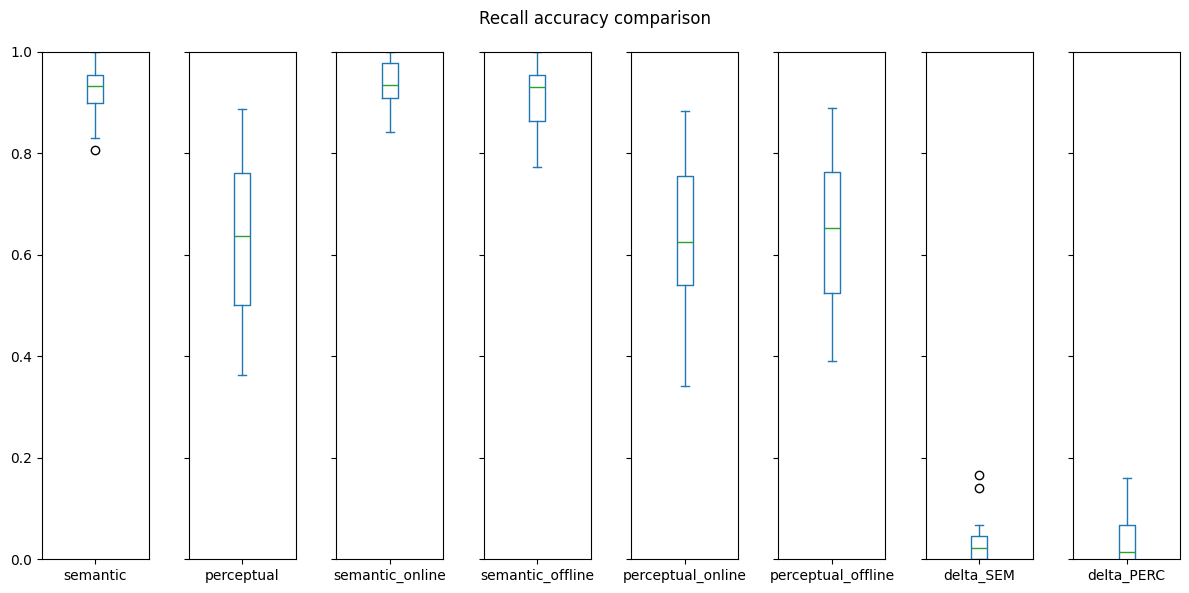

In [20]:
import matplotlib.pyplot as plt

# Sample data

# Using pandas plot method
final_results_df.plot(kind='box', subplots=True, layout=(1, len(df.columns)), figsize=(12, 6), sharey=True, title = "Recall accuracy comparison", ylim = (0,1))
plt.tight_layout()
plt.show()

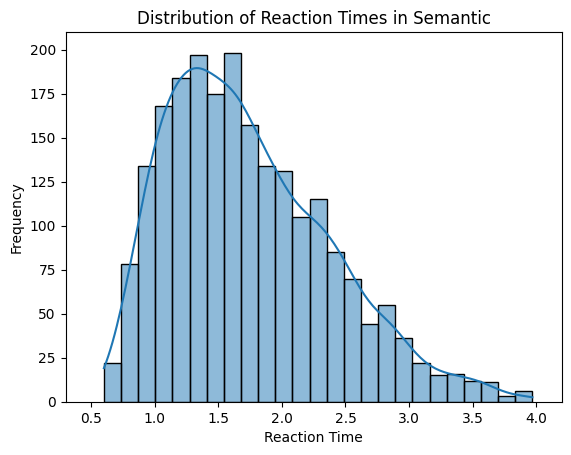

In [21]:
import seaborn as sns

reaction_times_semantic = pd.concat([df['answer_rt'] for df in semantic], ignore_index=True)

sns.histplot(reaction_times_semantic, kde=True)
plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times in Semantic')
plt.xlim(0.3, 4.2)
plt.ylim(0, 210)
plt.show()


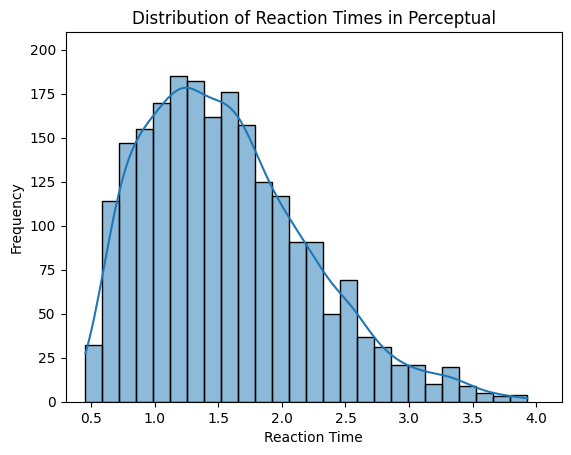

In [22]:
reaction_times_perceptual = pd.concat([df['answer_rt'] for df in perceptual], ignore_index=True)

sns.histplot(reaction_times_perceptual, kde=True)
plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times in Perceptual')
plt.xlim(0.3, 4.2)
plt.ylim(0, 210)
plt.show()


In [23]:
semantic_mean_reaction_time = reaction_times_semantic.mean()
semantic_std_reaction_time = reaction_times_semantic.std()
semantic_min_reaction_time = reaction_times_semantic.min()
semantic_max_reaction_time = reaction_times_semantic.max()

perceptual_mean_reaction_time = reaction_times_perceptual.mean()
perceptual_std_reaction_time = reaction_times_perceptual.std()
perceptual_min_reaction_time = reaction_times_perceptual.min()
perceptual_max_reaction_time = reaction_times_perceptual.max()


In [24]:
print(f"semantic_mean_reaction_time: {semantic_mean_reaction_time}\nsemantic_std_reaction_time: {semantic_std_reaction_time}\nsemantic_min_reaction_time: {semantic_min_reaction_time}\nsemantic_max_reaction_time: {semantic_max_reaction_time}\n\nperceptual_mean_reaction_time: {perceptual_mean_reaction_time}\nperceptual_std_reaction_time: {perceptual_std_reaction_time}\nperceptual_min_reaction_time: {perceptual_min_reaction_time}\nperceptual_max_reaction_time: {3.666825}\n")

semantic_mean_reaction_time: 1.7377910784185537
semantic_std_reaction_time: 0.6397984767591542
semantic_min_reaction_time: 0.6006016000173986
semantic_max_reaction_time: 3.970375799923204

perceptual_mean_reaction_time: 1.5676714658432127
perceptual_std_reaction_time: 0.6482375552973394
perceptual_min_reaction_time: 0.4554910999722779
perceptual_max_reaction_time: 3.666825



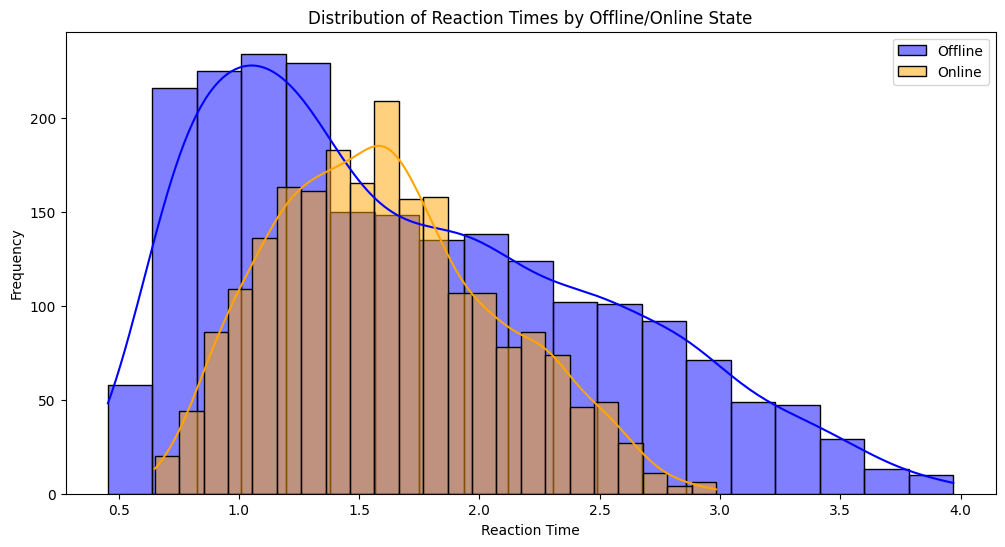

In [25]:
dfs = merged_sem + merged_perc

combined_df = pd.concat(dfs, ignore_index=True)

reaction_times_state_0 = combined_df[combined_df['STATE'] == 0]['answer_rt']
reaction_times_state_1 = combined_df[combined_df['STATE'] == 1]['answer_rt']

plt.figure(figsize=(12, 6))

sns.histplot(reaction_times_state_0, kde=True, color='blue', label='Offline')
sns.histplot(reaction_times_state_1, kde=True, color='orange', label='Online')

plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Times by Offline/Online State')
plt.legend()
plt.show()


In [26]:
m_all = m_sem_rec + m_perc_rec

recall_dict = {}

for dataframe in m_all:
    for _, row in dataframe.iterrows():

        sentence = row['sentence']
        recall_acc = row['recall_acc']
        if sentence not in recall_dict:
            recall_dict[sentence] = {'num_recall': 0, 'num_occurrence': 0}
        
        recall_dict[sentence]['num_recall'] += recall_acc
        recall_dict[sentence]['num_occurrence'] += 1

sentence_usage_recall = pd.DataFrame([(sentence, values['num_recall'], values['num_occurrence']) 
                          for sentence, values in recall_dict.items()], 
                         columns=['sentence', 'num_recall', 'num_occurrence'])

sentence_usage_recall['recall_percentage'] = sentence_usage_recall['num_recall'] / sentence_usage_recall['num_occurrence'] * 100

sentence_usage_recall = sentence_usage_recall.sort_values('recall_percentage', ascending = False)


/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/2415848246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentence_usage_recall, x='recall_percentage', y='sentence', palette='viridis')


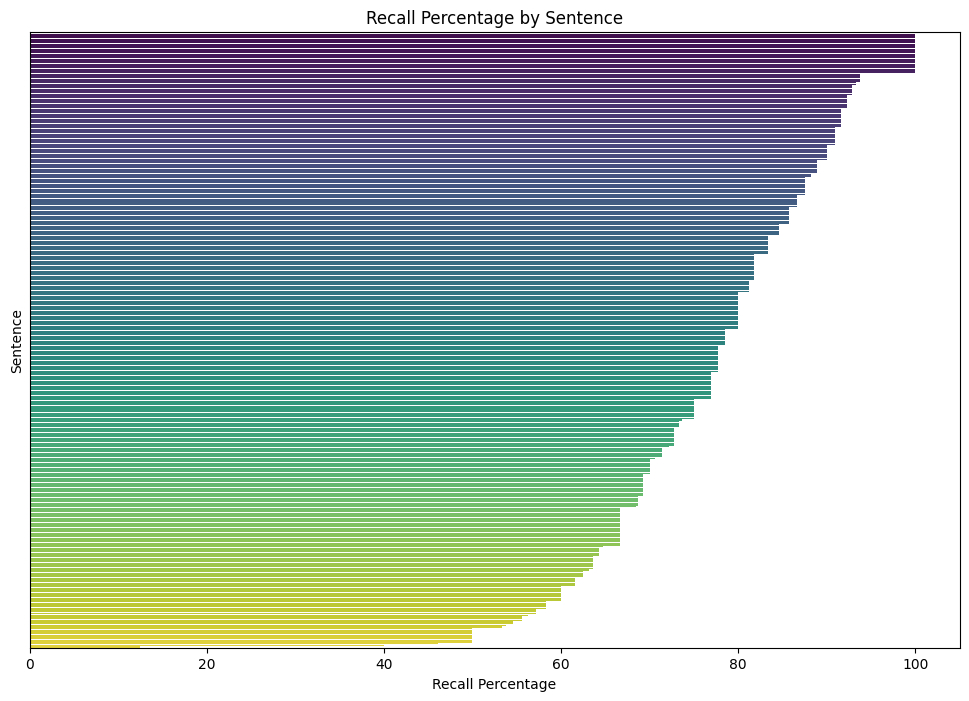

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sentence_usage_recall, x='recall_percentage', y='sentence', palette='viridis')
plt.xlabel('Recall Percentage')
plt.ylabel('Sentence')
plt.yticks([])
plt.title('Recall Percentage by Sentence')
plt.show()

In [28]:
sentence_usage_recall = sentence_usage_recall.sort_values('num_occurrence', ascending = False)

/var/folders/d5/1jwv81jn6yg7294shcdcf4m40000gn/T/ipykernel_88089/1365488967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentence_usage_recall, x='num_occurrence', y='sentence', palette='viridis')


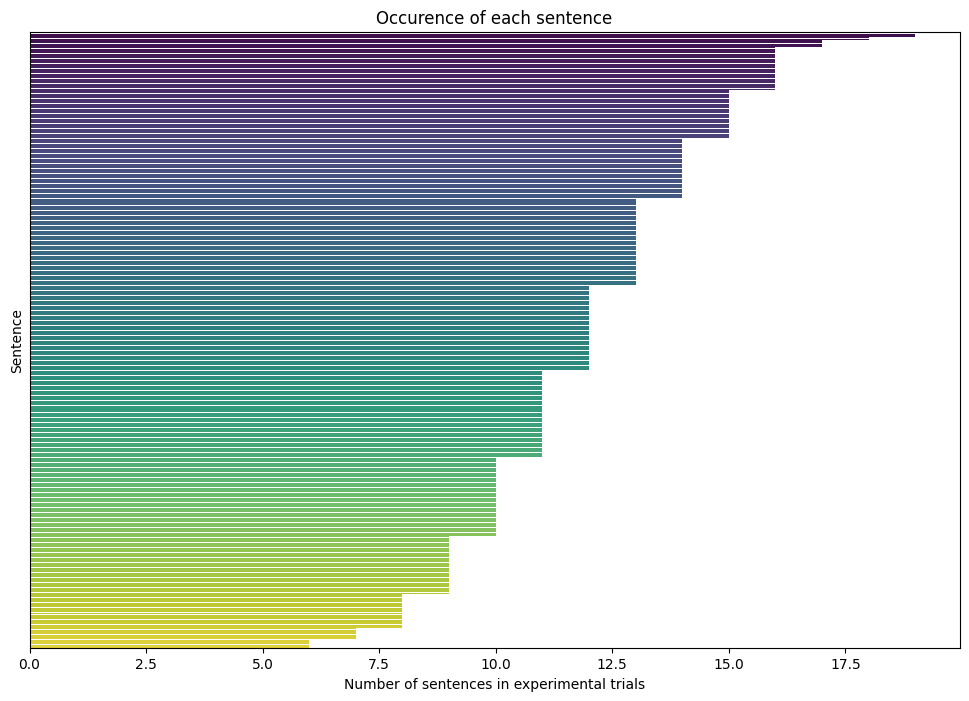

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sentence_usage_recall, x='num_occurrence', y='sentence', palette='viridis')
plt.xlabel('Number of sentences in experimental trials')
plt.ylabel('Sentence')
plt.yticks([])
plt.title('Occurence of each sentence')
plt.show()

In [30]:
recall_dict = {}

for dataframe in m_sem_rec:
    for _, row in dataframe.iterrows():

        sentence = row['sentence']
        recall_acc = row['recall_acc']
        if sentence not in recall_dict:
            recall_dict[sentence] = {'num_recall': 0, 'num_occurrence': 0}
        
        recall_dict[sentence]['num_recall'] += recall_acc
        recall_dict[sentence]['num_occurrence'] += 1

sentence_usage_recall_sem = pd.DataFrame([(sentence, values['num_recall'], values['num_occurrence']) 
                          for sentence, values in recall_dict.items()], 
                         columns=['sentence', 'num_recall', 'num_occurrence'])

sentence_usage_recall_sem['recall_percentage'] = sentence_usage_recall_sem['num_recall'] / sentence_usage_recall_sem['num_occurrence'] * 100

sentence_usage_recall_sem = sentence_usage_recall_sem.sort_values('sentence', ascending = True)
sentence_usage_recall_sem


,sentence,num_recall,num_occurrence,recall_percentage
291,Aktor gra w filmach,6,6,100.000000
128,Akwarele to farby wodne,5,5,100.000000
301,Aligator pływa w wodzie,3,3,100.000000
364,Aloes rośnie na Księżycu,1,1,100.000000
309,Alpaka to gatunek owada,5,6,83.333333
...,...,...,...,...
331,Żeglarstwo odbywa się na wodzie,5,6,83.333333
96,Żołądek trawi pokarm.,5,6,83.333333
311,Żubr to gatunek ptaka,6,7,85.714286
340,Żyła odprowadza krew do serca.,5,5,100.000000


In [31]:
recall_dict = {}

for dataframe in m_perc_rec:
    for _, row in dataframe.iterrows():

        sentence = row['sentence']
        recall_acc = row['recall_acc']
        if sentence not in recall_dict:
            recall_dict[sentence] = {'num_recall': 0, 'num_occurrence': 0}
        
        recall_dict[sentence]['num_recall'] += recall_acc
        recall_dict[sentence]['num_occurrence'] += 1

sentence_usage_recall_perc = pd.DataFrame([(sentence, values['num_recall'], values['num_occurrence']) 
                          for sentence, values in recall_dict.items()], 
                         columns=['sentence', 'num_recall', 'num_occurrence'])

sentence_usage_recall_perc['recall_percentage'] = sentence_usage_recall_perc['num_recall'] / sentence_usage_recall_perc['num_occurrence'] * 100

sentence_usage_recall_perc = sentence_usage_recall_perc.sort_values('sentence', ascending = True)
sentence_usage_recall_perc


,sentence,num_recall,num_occurrence,recall_percentage
71,Aktor gra w filmach,7,8,87.500000
6,Akwarele to farby wodne,4,5,80.000000
74,Aligator pływa w wodzie,2,3,66.666667
232,Aloes rośnie na Księżycu,7,8,87.500000
324,Alpaka to gatunek owada,4,4,100.000000
...,...,...,...,...
60,Żeglarstwo odbywa się na wodzie,5,5,100.000000
191,Żołądek trawi pokarm.,2,4,50.000000
352,Żubr to gatunek ptaka,1,3,33.333333
123,Żyła odprowadza krew do serca.,3,7,42.857143


In [32]:
sentence_usage_recall_sem = sentence_usage_recall_sem.rename(columns={'num_recall': 'num_recall_sem', 
                                         'num_occurrence': 'num_occurrence_sem', 
                                         'recall_percentage': 'recall_percentage_sem'})
sentence_usage_recall_perc = sentence_usage_recall_perc.rename(columns={'num_recall': 'num_recall_perc', 
                                           'num_occurrence': 'num_occurrence_perc', 
                                           'recall_percentage': 'recall_percentage_perc'})

sentence_usage_recall_compar = pd.concat([sentence_usage_recall_sem.set_index('sentence'), sentence_usage_recall_perc.set_index('sentence')], axis=1)

sentence_usage_recall_compar.reset_index(inplace=True)

sentence_usage_recall_compar[340:]

,sentence,num_recall_sem,num_occurrence_sem,recall_percentage_sem,num_recall_perc,num_occurrence_perc,recall_percentage_perc
340,Wywiadówka jest w szpitalu,2,4,50.000000,9.0,12.0,75.000000
341,Wątroba magazynuje energię.,3,3,100.000000,5.0,8.0,62.500000
342,Wątroba produkuje krew.,3,3,100.000000,5.0,8.0,62.500000
343,Wąż posiada cztery nogi,4,4,100.000000,2.0,8.0,25.000000
344,Wędkarze łapią ryby rękoma,5,5,100.000000,4.0,8.0,50.000000
345,Włosy rosną na głowie.,2,2,100.000000,5.0,7.0,71.428571
346,Wściekłość to negatywna emocja,4,4,100.000000,6.0,7.0,85.714286
347,Zając to zwierzę roślinożerne,5,5,100.000000,6.0,7.0,85.714286
348,Zazdrość to cecha ludzka,3,3,100.000000,2.0,5.0,40.000000
349,Zbiornik paliwa jest z papieru,6,6,100.000000,3.0,4.0,75.000000
